# Running using Param. Dictionaries

[This note-book is in oceantracker/tutorials_how_to/]

The earlier notebook showed how to set parameter and run using the helper class. Here we exploit the flexibility to run Oceantracker directly using a parameter dictionary built in code or read from file. 
   

## Build param. dict. with code

The below extends the minimal_example, shows two ways to build a parameter dictionary and different ways to run OceanTracker, from code or command line.  



In [15]:
# build a more complex dictionary of parameters using code
params={
    'output_file_base' :'param_test1',      # name used as base for output files
    'root_output_dir':'output',             #  output is put in dir   'root_output_dir'\\'output_file_base'
    'time_step' : 120,  #  2 min time step as seconds  
    'reader_class':{'input_dir': '..\\demos\\demo_hindcast',  # folder to search for hindcast files, sub-dirs will, by default, also be searched
                        'file_mask': 'demoHindcastSchism*.nc',    # the file mask of the hindcast files
                        },
    # add  release locations from two points, 
    #       particle_release_groups are a list of one or more release groups 
    #               (ie locations where particles are released at the same times and locations) 
    'release_groups_dict': {
            'my_release_point' :{'points':[[1595000, 5482600],
                                                [1599000, 5486200]],      # must be an N by 2 or 3 or list, convertible to a numpy array
                                'release_interval': 3600,           # seconds between releasing particles
                                'pulse_size': 10,                   # number of particles released each release_interval
                                },
            'my_polygon_release': {'class_name': 'oceantracker.particle_release_groups.polygon_release.PolygonRelease', # use a polygon release
                                    'points':[   [1597682.1237, 5489972.7479],
                                                    [1598604.1667, 5490275.5488],
                                                    [1598886.4247, 5489464.0424],
                                                    [1597917.3387, 5489000],
                                                    [1597300, 5489000], [1597682.1237, 5489972.7479]],
                                    'release_interval': 7200,           # seconds between releasing particles
                                    'pulse_size': 20,                   # number of particles released each release_interval
                                    },    
                                    },
    'resuspension_class' : {'critical_friction_velocity': .005}, # only re-suspend particles if friction vel. exceeds this value
    
    # velocity_modifiers are a set of velocities added to  water velocity give in  hydrodynamic model's 
    'velocity_modifiers_dict' : {   # here a fall velocity with given mean and variance is added to the computation 
                                'fall_velocity': {'class_name' : 'oceantracker.velocity_modifiers.terminal_velocity.TerminalVelocity', 
                                                    'mean': -0.001,'variance': 0.0002}
                                },                      
        }

# write params to build on for later examples
from oceantracker.util import json_util, yaml_util
json_util.write_JSON('.\\example_param_files\\param_test1.json', params) 
yaml_util.write_YAML('.\\example_param_files\\param_test1.yaml', params)

  ### Param. dict. from template

  Use a provided template, which pre-defines most top level that can be used, then set these using assignments. Reproducing the above in code...



In [16]:
from oceantracker import main

# repeat above using a template
params = main.param_template()  # get a copy of the template

params['output_file_base'] ='param_test1'
params['root_output_dir']= 'output'             #  output is put in dir   'root_output_dir'\\'output_file_base'
params['time_step']= 120  #  2 min time step as seconds  
params['reader_class']['input_dir']= '..\\demos\\demo_hindcast'  # folder to search for hindcast files, sub-dirs will, by default, also be searched
params['reader_class']['file_mask']= 'demoHindcastSchism*.nc'    # the file mask of the hindcast files

params['particle_release_groups_dict']['my_release_point'] = {
                                            'points':[[1595000, 5482600],
                                                   [1599000, 5486200]],      # must be an N by 2 or 3 or list, convertible to a numpy array
                                            'release_interval': 3600,           # seconds between releasing particles
                                            'pulse_size': 10,                   # number of particles released each release_interval
                                            }
params['particle_release_groups_dict']['my_polygon_release'] = {
                                            'class_name': 'oceantracker.particle_release_groups.polygon_release.PolygonRelease', # use a polygon release
                                            'points':[   [1597682.1237, 5489972.7479],
                                                        [1598604.1667, 5490275.5488],
                                                        [1598886.4247, 5489464.0424],
                                                        [1597917.3387, 5489000],
                                                        [1597300, 5489000], [1597682.1237, 5489972.7479]],
                                            'release_interval': 7200,           # seconds between releasing particles
                                            'pulse_size': 20,                   # number of particles released each release_interval
                                            }   
params['resuspension_class']['critical_friction_velocity']= .005

params['velocity_modifiers_dict']['my_fall_velocity']= {   # here a fall velocity with given mean and variance is added to the computation 
                                                    'class_name' : 'oceantracker.velocity_modifiers.terminal_velocity.TerminalVelocity', 
                                                     'mean': -0.001,'variance': 0.0002
                                                    }

In [17]:
# show the full template as json
import json
print( json.dumps(params, indent=4))

{
    "add_date_to_run_output_dir": null,
    "advanced_settings": null,
    "backtracking": null,
    "compact_mode": null,
    "debug": null,
    "max_duration": null,
    "minimum_total_water_depth": null,
    "output_file_base": "param_test1",
    "processors": null,
    "root_output_dir": "output",
    "run_as_depth_averaged": null,
    "screen_output_time_interval": null,
    "time_step": 120,
    "user_note": null,
    "write_grid": null,
    "write_output_files": null,
    "block_dry_cells": null,
    "case_output_file_tag": null,
    "duration": null,
    "open_boundary_type": null,
    "particle_buffer_size": null,
    "retain_culled_part_locations": null,
    "write_tracks": null,
    "z0": null,
    "dispersion_class": {},
    "reader_class": {
        "input_dir": "..\\demos\\demo_hindcast",
        "file_mask": "demoHindcastSchism*.nc"
    },
    "resuspension_class": {
        "critical_friction_velocity": 0.005
    },
    "tracks_writer_class": {},
    "event_loggers_di

  ### Show parameters in yaml format

  yaml format has no brackets/braces and relies on tab indenting to nest items

In [18]:
# show the full template in yaml format
import yaml
print( yaml.dump(params))

add_date_to_run_output_dir: null
advanced_settings: null
backtracking: null
block_dry_cells: null
case_output_file_tag: null
compact_mode: null
debug: null
dispersion_class: {}
duration: null
event_loggers_dict: {}
fields_dict: {}
max_duration: null
minimum_total_water_depth: null
open_boundary_type: null
output_file_base: param_test1
particle_buffer_size: null
particle_concentrations_dict: {}
particle_properties_dict: {}
particle_release_groups_dict:
  my_polygon_release:
    class_name: oceantracker.particle_release_groups.polygon_release.PolygonRelease
    points:
    - - 1597682.1237
      - 5489972.7479
    - - 1598604.1667
      - 5490275.5488
    - - 1598886.4247
      - 5489464.0424
    - - 1597917.3387
      - 5489000
    - - 1597300
      - 5489000
    - - 1597682.1237
      - 5489972.7479
    pulse_size: 20
    release_interval: 7200
  my_release_point:
    points:
    - - 1595000
      - 5482600
    - - 1599000
      - 5486200
    pulse_size: 10
    release_interval: 3600
p

## Running OceanTracker

There are several ways to run OceanTracker 
    
1) By coding 
    - build parameters in code and run

    - or coding to read parameter file and then run  

2) Without coding

    - run from command line with parameter file which is built by editing a json/yaml text file

Note:

There are many ways to run the code, eg. with IDE like Pycharm, Visual Studio Code. It can also, as here, be run in iPython notebooks. However the way notebooks are implemented can sometimes result in issues: 

  -  errors  when running Oceantracker a second time or other unexpected behavior, due to shared memory space, fix by reloading the kernel

  - if using note books on Windows, it is not possible to run Oceantracker cases in parallel, without a work around  given in a later "how to".

### Run with code built params.

In [25]:
# run oceantracker using param dict built in cells above
from oceantracker import main

case_info_file_name, has_errors = main.run(params) 
# case_info file is the name of a json file useful in plotting results 

startup: --------------------------------------------------------------------------
startup: OceanTracker- preliminary setup
startup:      Python version: 3.10.10 | packaged by Anaconda, Inc. | (main, Mar 21 2023, 18:39:17) [MSC v.1916 64 bit (AMD64)]
startup:   - found hydro-model files of type SCHISIM
startup:       -  sorted hyrdo-model files in time order,	  0.008 sec
startup:     >>> Note: output is in dir= e:\OneDrive - Cawthron\H_Local_drive\ParticleTracking\oceantracker\tutorials_how_to\output\param_test1
startup:     >>> Note: to help with debugging, parameters as given by user  are in "param_test1_raw_user_params.json"
P000: --------------------------------------------------------------------------
P000: Starting case number   0,  param_test1 at 2023-05-31T11:58:38.389693
P000: --------------------------------------------------------------------------
P000:       -  built node to triangles map,	  0.000 sec
P000:       -  built triangle adjacency matrix,	  0.000 sec
P000:     

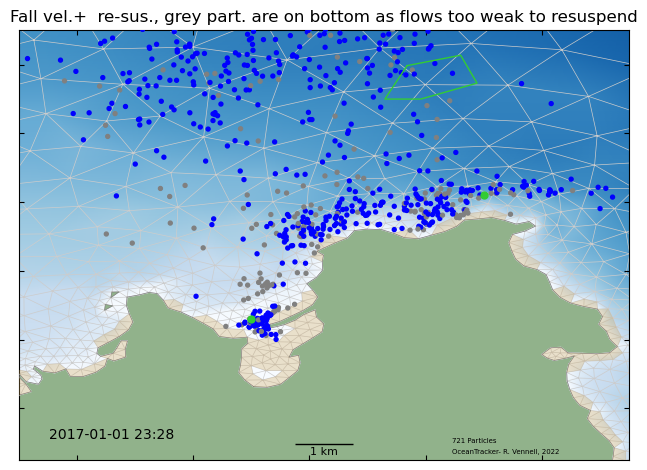

In [24]:
# plot animation of results
from matplotlib import pyplot as plt
from oceantracker.post_processing.plotting.plot_tracks import animate_particles
from oceantracker.post_processing.read_output_files import  load_output_files
from IPython.display import HTML # show animation in note book

# read particle track data into a dictionary using case_info_file_name
tracks = load_output_files.load_particle_track_vars(case_info_file_name)

ax= [1591000, 1601500, 5478500, 5491000]  # area to plot
# animate particles
anim = animate_particles(tracks, axis_lims=ax,title='Fall vel.+  re-sus., grey part. are on bottom when flows too weak to resuspend', 
                         show_dry_cells=True, show_grid=True, show=False) # use ipython to show video, rather than matplotlib plt.show()

# this is slow to build! 
HTML(anim.to_html5_video())

### Run by reading param. file


In [20]:
from oceantracker import main
from oceantracker.util import yaml_util

# read a json or yaml file  of parameters
params = yaml_util.read_YAML('.\\example_param_files\\param_test1.yaml')

case_info_file_name, has_errors = main.run(params) 


startup: --------------------------------------------------------------------------
startup: OceanTracker- preliminary setup
startup:      Python version: 3.10.10 | packaged by Anaconda, Inc. | (main, Mar 21 2023, 18:39:17) [MSC v.1916 64 bit (AMD64)]
startup:   - found hydro-model files of type SCHISIM
startup:       -  sorted hyrdo-model files in time order,	  0.008 sec
startup:     >>> Note: output is in dir= e:\OneDrive - Cawthron\H_Local_drive\ParticleTracking\oceantracker\tutorials_how_to\output\param_test1
startup:     >>> Note: to help with debugging, parameters as given by user  are in "param_test1_raw_user_params.json"
P000: --------------------------------------------------------------------------
P000: Starting case number   0,  param_test1 at 2023-05-31T11:54:18.875136
P000: --------------------------------------------------------------------------
P000:       -  built node to triangles map,	  0.000 sec
P000:       -  built triangle adjacency matrix,	  0.000 sec
P000:     

### Run from command line 

 Run without coding from command lin bu using a parameter file pre-built in a text editor.

From within an activated oceantracker conda environment, run  command line below.

On Windows, do this within an anaconda/miniconda prompt window with an activated environment.

In [21]:
!python ..\\oceantracker\\run_oceantracker.py .\\example_param_files\\param_test1.json

startup: --------------------------------------------------------------------------
startup: OceanTracker- preliminary setup
startup:      Python version: 3.10.10 | packaged by Anaconda, Inc. | (main, Mar 21 2023, 18:39:17) [MSC v.1916 64 bit (AMD64)]
startup:   - found hydro-model files of type SCHISIM
startup:       -  sorted hyrdo-model files in time order,	  0.615 sec
startup:     >>> Note: output is in dir= e:\OneDrive - Cawthron\H_Local_drive\ParticleTracking\oceantracker\tutorials_how_to\output\param_test1
startup:     >>> Note: to help with debugging, parameters as given by user  are in "param_test1_raw_user_params.json"
P000: --------------------------------------------------------------------------
P000: Starting case number   0,  param_test1 at 2023-05-31T11:54:24.163503
P000: --------------------------------------------------------------------------
P000:       -  built node to triangles map,	  0.653 sec
P000:       -  built triangle adjacency matrix,	  0.291 sec
P000:     

#### Options when running at command line

These allow

- redefining the input and output dirs given within parameter file, which may have been built for a different location
- limiting the run duration or the number of parallel cases during testing

the full arguments are below

In [22]:
!python ..\\oceantracker\\run_oceantracker.py -h

usage: run_oceantracker.py [-h] [--input_dir INPUT_DIR]
                           [--root_output_dir ROOT_OUTPUT_DIR]
                           [--processors PROCESSORS] [--duration DURATION]
                           [--cases CASES] [-debug]
                           param_file

positional arguments:
  param_file            json or yaml file of input parameters

options:
  -h, --help            show this help message and exit
  --input_dir INPUT_DIR
                        overrides dir for hindcast files given in param file
  --root_output_dir ROOT_OUTPUT_DIR
                        overrides root output dir given in param file
  --processors PROCESSORS
                        overrides number of processors in param file
  --duration DURATION   in seconds, overrides model duration in seconds of all
                        of cases, useful in testing
  --cases CASES         only runs first "cases" of the case_list, useful in
                        testing
  -debug                